<a href="https://colab.research.google.com/github/KevinHern/SP1-Educational-Material/blob/main/demos/SP1_02_Demo_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMO #02

What you will learn:


*   How to manipulate Datasets with Pandas
*   What is Tensorflow and how to use it
*   How to create Neural Networks for Regression and Classification Tasks



# Pandas (Dataset Manipulation)

"*pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.*"

[Panda's Official Documentation](https://pandas.pydata.org)

-----

Pandas is a powerful library used to manipulate and analyze data. This library imitates R's philosophy and Sintax (both are very similar!)

Pandas is powerful at **manipulating structured data**, so keep in mind this library will shine with table-looking shaped datasets.
In few lines, you can do a lot of stuff!

Advantages:
* Provides efficient and optimized ways to manipulate data
* Supports multiple file formats
* Can easily merge, divide, join, filter and other type of operations in a similar fashion to SQL!

Limitaitons:
* Can only deal with structured data

Recommended Resources:
* [Official Documentation](https://pandas.pydata.org/docs/)
* [Geeksforgeeks](https://www.geeksforgeeks.org/pandas-tutorial/)
* [w3Schools](https://www.w3schools.com/python/pandas/default.asp)


## Loading Dataset

In [ ]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data

--2023-01-17 07:48:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8726 (8.5K) [application/x-httpd-php]
Saving to: ‘machine.data’

machine.data        100%[===================>]   8.52K  --.-KB/s    in 0s      

2023-01-17 07:48:29 (73.1 MB/s) - ‘machine.data’ saved [8726/8726]



In [ ]:
# For dataset manipulation
import pandas as pd

# Loading Dataset and have a glimpse about it
column_names = ['Vendor','Model','MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

raw_dataset = pd.read_csv("machine.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

## .describe()

In [ ]:
# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


## .head() and .tail()

In [ ]:
# Summary of the dataset (takes the top N rows)
raw_dataset.head(n=10)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [ ]:
# Summary of the dataset (takes the bottom N rows)
raw_dataset.tail(n=5)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


## Shape

In [ ]:
# Shape is a fancy way of calling Dataset's dimension
raw_dataset.shape

(209, 10)

## Column Manipulation

### Extract Column

In [ ]:
# Like a dictionary, pass the EXACT name of the column to extract one column
raw_dataset["Vendor"]

0      adviser
1       amdahl
2       amdahl
3       amdahl
4       amdahl
        ...   
204     sperry
205     sperry
206     sratus
207       wang
208       wang
Name: Vendor, Length: 209, dtype: object

### Add column



In [ ]:
# To extract multiple, use an array instead
raw_dataset["One"] = 1
raw_dataset

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,One
0,adviser,32/60,125,256,6000,256,16,128,198,199,1
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253,1
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253,1
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253,1
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132,1
...,...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37,1
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50,1
206,sratus,32,125,2000,8000,0,2,14,52,41,1
207,wang,vs-100,480,512,8000,32,0,0,67,47,1


### Delete Column


In [ ]:
raw_dataset.pop("One")
raw_dataset

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


### Column Values

In [ ]:
# Check all the unique values
raw_dataset["Vendor"].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [ ]:
# Count the values of the column
raw_dataset["Vendor"].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: Vendor, dtype: int64

## Row Manipulation

### "SELECT" and "WHERE"

In [ ]:
# Select rows that meet a column value criteria
raw_dataset.loc[raw_dataset["Vendor"] == "ibm"]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
93,ibm,3033:s,57,4000,16000,1,6,12,132,82
94,ibm,3033:u,57,4000,24000,64,12,16,237,171
95,ibm,3081,26,16000,32000,64,16,24,465,361
96,ibm,3081:d,26,16000,32000,64,8,24,465,350
97,ibm,3083:b,26,8000,32000,0,8,24,277,220
98,ibm,3083:e,26,8000,16000,0,8,16,185,113
99,ibm,370/125-2,480,96,512,0,1,1,6,15
100,ibm,370/148,203,1000,2000,0,1,5,24,21
101,ibm,370/158-3,115,512,6000,16,1,6,45,35
102,ibm,38/3,1100,512,1500,0,1,1,7,18


In [ ]:
# Select rows that meet a column value criteria
raw_dataset.loc[raw_dataset["MYCT"] == 25]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
30,cdc,cyber:170/750,25,1310,2620,131,12,24,274,102
31,cdc,cyber:170/760,25,1310,2620,131,12,24,368,102
118,ibm,4361-4,25,2000,12000,8,1,4,49,59
119,ibm,4361-5,25,2000,12000,16,3,5,66,65


In [ ]:
# Combine conditions
raw_dataset.loc[(raw_dataset["MYCT"] <= 25) & (raw_dataset["MYCT"] >= 1)]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
30,cdc,cyber:170/750,25,1310,2620,131,12,24,274,102
31,cdc,cyber:170/760,25,1310,2620,131,12,24,368,102
118,ibm,4361-4,25,2000,12000,8,1,4,49,59
119,ibm,4361-5,25,2000,12000,16,3,5,66,65
120,ibm,4381-1,17,4000,16000,8,6,12,100,101
121,ibm,4381-2,17,4000,16000,32,6,12,133,116


In [ ]:
# Combine conditions
raw_dataset.loc[(raw_dataset["Vendor"] == "ibm") & (raw_dataset["MYCT"] <= 25)]

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
118,ibm,4361-4,25,2000,12000,8,1,4,49,59
119,ibm,4361-5,25,2000,12000,16,3,5,66,65
120,ibm,4381-1,17,4000,16000,8,6,12,100,101
121,ibm,4381-2,17,4000,16000,32,6,12,133,116


### Random Subset

In [ ]:
# Shuffles the rows and then returns the fraction desired
raw_dataset.sample(frac = 0.5, random_state = 1000)

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
152,nas,as/8060,35,8000,32000,64,8,24,370,270
73,harris,100,300,768,3000,0,6,24,36,23
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
171,nixdorf,8890/50,200,1000,4000,0,1,4,30,25
16,burroughs,b1955,167,524,2000,8,4,15,19,23
...,...,...,...,...,...,...,...,...,...,...
117,ibm,4341-9,225,1000,4000,2,3,6,24,26
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
84,honeywell,dps:7/45,330,1000,4000,0,3,6,22,25
46,dec,microvax-1,810,512,512,8,1,1,18,18


### Merge

In [ ]:
# Lets make two dataset dummies
dataset_one = raw_dataset.sample(frac = 0.5, random_state = 100)
dataset_two = raw_dataset.sample(frac = 0.5, random_state = 250)

In [ ]:
# No Information Loss Merge
pd.concat([dataset_one, dataset_two])

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
164,ncr,v8595:ii,56,4000,16000,0,1,8,46,78
190,siemens,7.875-2,26,8000,24000,32,8,16,173,183
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
182,siemens,7.531,240,512,2000,8,1,5,11,22
...,...,...,...,...,...,...,...,...,...,...
79,harris,800,180,768,12000,6,1,31,84,53
76,harris,600,300,768,4500,0,1,24,45,27
104,ibm,38/5,600,768,2000,0,1,1,16,20
163,ncr,v8585:ii,56,4000,12000,0,1,8,42,62


In [ ]:
# JOIN merge
pd.concat([dataset_one, dataset_two], join="inner")

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
164,ncr,v8595:ii,56,4000,16000,0,1,8,46,78
190,siemens,7.875-2,26,8000,24000,32,8,16,173,183
59,formation,f4000/200ap,800,256,8000,0,1,4,20,34
81,honeywell,dps:6/92,300,1000,4000,8,3,64,38,30
182,siemens,7.531,240,512,2000,8,1,5,11,22
...,...,...,...,...,...,...,...,...,...,...
79,harris,800,180,768,12000,6,1,31,84,53
76,harris,600,300,768,4500,0,1,24,45,27
104,ibm,38/5,600,768,2000,0,1,1,16,20
163,ncr,v8585:ii,56,4000,12000,0,1,8,42,62


# [Tensorflow](https://www.tensorflow.org/?hl=es-419) (AI library)

TL;DR: A platform and library to work on AI related projects. It is user friendly and is easy to learn.

Advantages:
* Allows to train any kind of AI: from the simplest one to the craziest ones
* It has Web, PC and edge technology dispositives (such as phones and microcontorllers) coverage 
* Widely used and well documented
* Available for Python and JavaScript
* Posseses great abstraction capabilities → User only cares about creating and technical details are hidden from them

Tensorflow works with the philosophy of "tensors flowing" or vectors moving from one point to another.
The library helps to develop dataflow graphs that describe how data traverses through a multidimensional graph, composed by nodes.



# 0) Preparations

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Regression


## 1) Dataset Preparations

In [ ]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data

--2022-01-28 00:01:32--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8726 (8.5K) [application/x-httpd-php]
Saving to: ‘machine.data’

machine.data        100%[===================>]   8.52K  --.-KB/s    in 0s      

2022-01-28 00:01:32 (80.8 MB/s) - ‘machine.data’ saved [8726/8726]



In [ ]:
# Loading Dataset and have a glimpse about it
column_names = ['Vendor','Model','MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

raw_dataset = pd.read_csv("machine.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
# Lets check columns
raw_dataset.columns

Index(['Vendor', 'Model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX',
       'PRP', 'ERP'],
      dtype='object')

In [ ]:
# Summary of the dataset
raw_dataset.head()

,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(209, 10)

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

Vendor    0
Model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64


,Vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


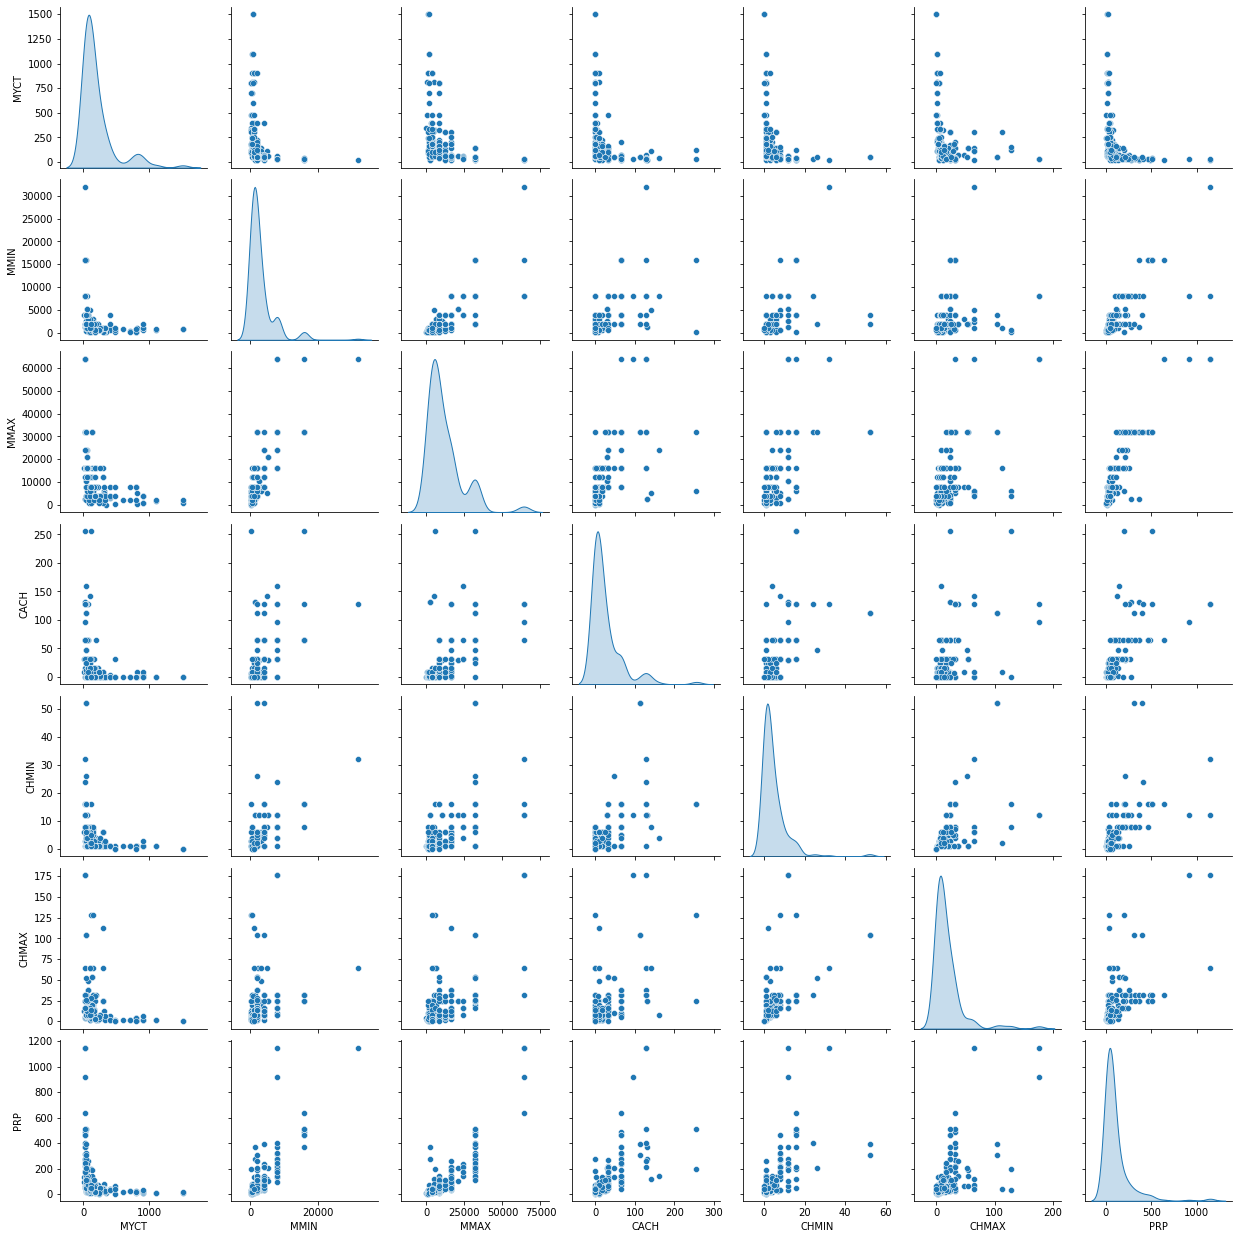

In [ ]:
# Lets visualize the data
sns.pairplot(new_dataset[['MYCT','MMIN','MMAX',
                'CACH', 'CHMIN', 'CHMAX', 'PRP']], diag_kind="kde")

## 2) NN for a simple Regression

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = ['MYCT','MMIN','MMAX','CACH', 'CHMIN', 'CHMAX', 'PRP']
dependent_variables = ['ERP']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_set

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
33,50,2620,10480,30,12,24,63
151,40,8000,32000,64,8,24,277
10,400,1000,3000,0,1,2,38
133,100,1000,8000,24,3,6,32
20,143,1500,6300,0,5,32,30
...,...,...,...,...,...,...,...
203,180,512,4000,0,1,3,21
125,50,2000,4000,0,3,6,27
198,30,8000,64000,96,12,176,915
116,180,2000,16000,16,1,6,66


In [ ]:
train_target

,ERP
33,74
151,266
10,23
133,46
20,35
...,...
203,24
125,30
198,919
116,76


In [ ]:
# Lets build a simple model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables))),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  
  # Last layer of the model and its activation function decide if it is a regression or classification problem!
  tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=15,
          batch_size = 32,
          validation_split=0.2,
        )

Epoch 1/15
5/5 [==============================] - 2s 41ms/step - loss: 301045.1875 - root_mean_squared_error: 548.6758 - val_loss: 93339.5781 - val_root_mean_squared_error: 305.5153
Epoch 2/15
5/5 [==============================] - 0s 7ms/step - loss: 35660.2305 - root_mean_squared_error: 188.8392 - val_loss: 5209.7090 - val_root_mean_squared_error: 72.1783
Epoch 3/15
5/5 [==============================] - 0s 8ms/step - loss: 11490.1621 - root_mean_squared_error: 107.1922 - val_loss: 43658.5352 - val_root_mean_squared_error: 208.9462
Epoch 4/15
5/5 [==============================] - 0s 7ms/step - loss: 28977.4531 - root_mean_squared_error: 170.2276 - val_loss: 51912.5977 - val_root_mean_squared_error: 227.8434
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 31284.3359 - root_mean_squared_error: 176.8738 - val_loss: 47130.4570 - val_root_mean_squared_error: 217.0955
Epoch 6/15
5/5 [==============================] - 0s 7ms/step - loss: 27874.1289 - root_mean_squared

In [ ]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=32)

2/2 [==============================] - 0s 9ms/step - loss: 2464.5286 - root_mean_squared_error: 49.6440


[2464.528564453125, 49.64401626586914]

## 3) NN for multiple Regressions

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = ['MYCT','MMIN','MMAX','CACH', 'CHMIN', 'CHMAX']
dependent_variables = ['PRP', 'ERP']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables))),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=len(dependent_variables), activation='relu'),
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=10,
          batch_size = 32 ,
          validation_split=0.2
        )

Epoch 1/10
5/5 [==============================] - 0s 37ms/step - loss: 2723522.7500 - root_mean_squared_error: 1650.3098 - val_loss: 1902005.1250 - val_root_mean_squared_error: 1379.1320
Epoch 2/10
5/5 [==============================] - 0s 8ms/step - loss: 1905453.5000 - root_mean_squared_error: 1380.3816 - val_loss: 1355028.3750 - val_root_mean_squared_error: 1164.0569
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 1352516.3750 - root_mean_squared_error: 1162.9774 - val_loss: 952589.5625 - val_root_mean_squared_error: 976.0070
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 886925.0000 - root_mean_squared_error: 941.7670 - val_loss: 683328.0000 - val_root_mean_squared_error: 826.6365
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 628248.1875 - root_mean_squared_error: 792.6211 - val_loss: 488348.5312 - val_root_mean_squared_error: 698.8194
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 415610.4

In [ ]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 [==============================] - 0s 17ms/step - loss: 64136.6602 - root_mean_squared_error: 253.2522


[64136.66015625, 253.25216674804688]

# Classification

## 1) Dataset Preparations

In [ ]:
'''
All the information regarding the dataset used for this demo can be found in the following link:
https://archive.ics.uci.edu/ml/datasets/Iris
'''

# Getting Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-01-28 00:47:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-01-28 00:47:00 (128 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
# Loading Dataset and have a glimpse about it
column_names = ['sepal_length','sepal_width','petal_length','petal_width', 'class']

raw_dataset = pd.read_csv("iris.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Lets check columns
raw_dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [ ]:
# Summary of the dataset
raw_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape 

(150, 5)

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


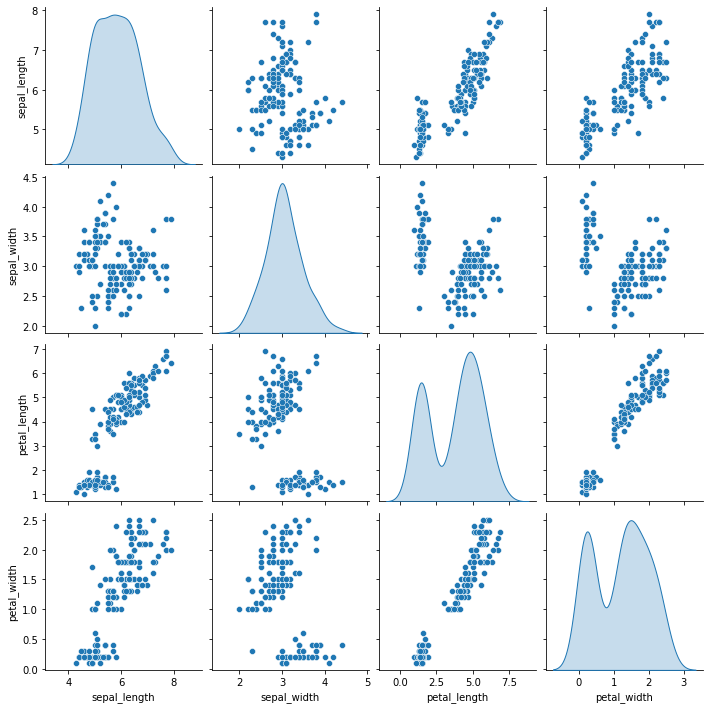

In [ ]:
# Lets visualize the data
sns.pairplot(new_dataset[['sepal_length','sepal_width','petal_length','petal_width']], diag_kind="kde")

In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = list(raw_dataset.columns)
independent_variables.remove('class')
dependent_variables = ['class']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_target, test_target

(               class
 83   Iris-versicolor
 63   Iris-versicolor
 77   Iris-versicolor
 130   Iris-virginica
 134   Iris-virginica
 ..               ...
 115   Iris-virginica
 12       Iris-setosa
 72   Iris-versicolor
 136   Iris-virginica
 116   Iris-virginica
 
 [120 rows x 1 columns],                class
 108   Iris-virginica
 67   Iris-versicolor
 11       Iris-setosa
 98   Iris-versicolor
 114   Iris-virginica
 133   Iris-virginica
 123   Iris-virginica
 5        Iris-setosa
 26       Iris-setosa
 109   Iris-virginica
 20       Iris-setosa
 59   Iris-versicolor
 30       Iris-setosa
 131   Iris-virginica
 10       Iris-setosa
 132   Iris-virginica
 9        Iris-setosa
 2        Iris-setosa
 142   Iris-virginica
 76   Iris-versicolor
 79   Iris-versicolor
 39       Iris-setosa
 145   Iris-virginica
 62   Iris-versicolor
 113   Iris-virginica
 85   Iris-versicolor
 101   Iris-virginica
 95   Iris-versicolor
 139   Iris-virginica
 82   Iris-versicolor)

In [ ]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

In [ ]:
train_target, test_target

(array([0, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2,
        1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0,
        2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1,
        1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1,
        0, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2,
        1, 0, 0, 1, 0, 1, 2, 0, 1, 1]),
 array([0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2,
        0, 1, 0, 1, 0, 1, 0, 1]))

## 2) NN for Classification

In [ ]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables))),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax')
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=25,
          batch_size = 128,
          validation_split=0.2
        )

Epoch 1/25
1/1 [==============================] - 1s 957ms/step - loss: 1.1362 - accuracy: 0.3542 - val_loss: 1.2489 - val_accuracy: 0.2917
Epoch 2/25
1/1 [==============================] - 0s 35ms/step - loss: 1.1204 - accuracy: 0.3542 - val_loss: 1.2262 - val_accuracy: 0.3333
Epoch 3/25
1/1 [==============================] - 0s 35ms/step - loss: 1.1053 - accuracy: 0.3646 - val_loss: 1.2050 - val_accuracy: 0.4167
Epoch 4/25
1/1 [==============================] - 0s 34ms/step - loss: 1.0914 - accuracy: 0.4271 - val_loss: 1.1843 - val_accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 0s 35ms/step - loss: 1.0781 - accuracy: 0.6250 - val_loss: 1.1652 - val_accuracy: 0.5417
Epoch 6/25
1/1 [==============================] - 0s 33ms/step - loss: 1.0652 - accuracy: 0.7083 - val_loss: 1.1459 - val_accuracy: 0.5417
Epoch 7/25
1/1 [==============================] - 0s 37ms/step - loss: 1.0533 - accuracy: 0.7188 - val_loss: 1.1267 - val_accuracy: 0.5417
Epoch 8/25
1/1 [==========

In [ ]:
# Lets evaluate our model
model.evaluate(x=test_set, y=test_target, batch_size=128)

1/1 [==============================] - 0s 17ms/step - loss: 0.8716 - accuracy: 0.6667


[0.8715998530387878, 0.6666666865348816]

In [ ]:
test_target

array([0, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 0, 1, 0, 1])

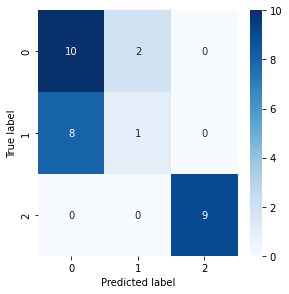

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# Generation

## 1) Data Preparations

In [ ]:
import itertools 
from keras.preprocessing import image

IMG_HEIGHT = 512
IMG_WIDTH = 256

img_rows = [(i-(IMG_WIDTH/2))/(IMG_WIDTH/2) for i in range(IMG_WIDTH)]
img_cols = [(j-(IMG_HEIGHT/2))/(IMG_HEIGHT/2) for j in range(IMG_HEIGHT)]

flatten_image = np.array(list(itertools.product(img_rows, img_cols)))

## 2) NN for Generation

In [ ]:
# Creating a custom Layer
class ScaleLayer(tf.keras.layers.Layer):
  def __init__(self, redScale=255.0, greenScale=255.0, blueScale=255.0):
    super(ScaleLayer, self).__init__()
    self.scale = tf.constant([redScale, greenScale, blueScale], dtype=tf.float32)

  def call(self, inputs):
    outputs = tf.dtypes.cast(inputs, tf.float32)
    outputs = outputs * self.scale
    return tf.dtypes.cast(outputs, tf.uint8)

(-0.5, 511.5, 255.5, -0.5)

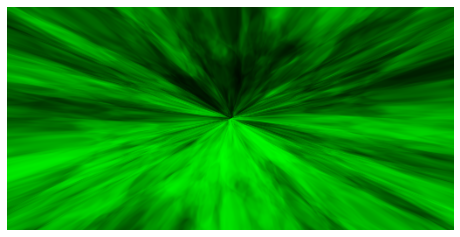

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(2, )),
  tf.keras.layers.Dense(units=128, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=256, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=512, activation='tanh', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=4), kernel_initializer=tf.keras.initializers.RandomUniform(minval=-4, maxval=4)),
  tf.keras.layers.Dense(units=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.random_normal()),
  ScaleLayer(redScale=0, greenScale=255, blueScale=0)
  ])

generated_image = np.reshape(np.array(model(flatten_image)), newshape=(IMG_WIDTH, IMG_HEIGHT, 3))

plt.figure(figsize=(8, 8))
plt.imshow(image.array_to_img(generated_image))
plt.axis("off")